# Matrices 

Many scientific calculations make heavy use of matrices. Julia has excellent support for matrices, including special classes, and interfaces to standard linear algebra libraries.

Matrices can be defined by hand, or using one of many functions for constructing matrices. To define matrices by hand, the following notation is used:

In [1]:
A = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

The spaces separate consecutive elements in the same row; the semicolons separate different rows.

[1] What is the type of `A`? What information is thus stored in the type of an array (comparing the types of a matrix and a vector)?

In [2]:
typeof(A)

Array{Int64,2}

[2] What does `R = [1 2]` do?

In [4]:
R = [1 2];
V = [1, 2];

println(typeof(R))
println(typeof(V))

Array{Int64,2}
Array{Int64,1}


[3] Define another $2 \times 2$ matrix `B` and experiment with matrix operations.

In [5]:
B = [-2 3; 4 -1]

2×2 Array{Int64,2}:
 -2   3
  4  -1

In [8]:
println("A = $A")
println("B = $B\n")
println("A + B = $(A + B)")
println("3B = $(3B)")
println("2A - B = $(2A - B)")
println("A² = $(A^2)") # Matrix multiplication of A with itself.
println("exp(A) = $(exp(A))") # Elementwise exponentiation.

A = [1 2; 3 4]
B = [-2 3; 4 -1]

A + B = [-1 5; 7 3]
3B = [-6 9; 12 -3]
2A - B = [4 1; 2 9]
A² = [7 10; 15 22]
exp(A) = [2.71828 7.38906; 20.0855 54.5982]


In [27]:
# Definition of a true matrix exponential function.

my_exp(A::Matrix) = sum([A^n/factorial(n) for n in 0:20])

my_exp (generic function with 1 method)

In [31]:
my_exp([1 1; 1 1])

2×2 Array{Float64,2}:
 4.19453  3.19453
 3.19453  4.19453

[4] How can we construct a matrix by dividing element by element the elements of `A` by those of `B`? 

In [11]:
# Note A/B is equivalent to A * inv(B)

A./B # Elementwise division of elements of A by corresponding elements of B

2×2 Array{Float64,2}:
 -0.5    0.666667
  0.75  -4.0     

[5] Experiment with different ways of constructing matrices: `zeros`, `ones`, `eye`, `diag`. Use the help function if necessary.

In [32]:
?zeros

search: zeros spzeros nonzeros dropzeros dropzeros! count_zeros



```
zeros(type, dims)
```

Create an array of all zeros of specified type. The type defaults to Float64 if not specified.

```
zeros(A)
```

Create an array of all zeros with the same element type and shape as `A`.


In [37]:
zeros(2,3)

2×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0

In [38]:
?ones

search: ones spones leading_ones trailing_ones nonzeros countlines count_ones



```
ones(type, dims)
```

Create an array of all ones of specified type. The type defaults to `Float64` if not specified.

```
ones(A)
```

Create an array of all ones with the same element type and shape as `A`.


In [39]:
ones(4,3)

4×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [40]:
?eye

search: eye KeyError speye eltype keytype supertype code_typed @code_typed



```
eye([T::Type=Float64,] m::Integer, n::Integer)
```

`m`-by-`n` identity matrix. The default element type is `Float64`.

```
eye([T::Type=Float64,] n::Integer)
```

`n`-by-`n` identity matrix. The default element type is `Float64`.

```
eye(A)
```

Constructs an identity matrix of the same dimensions and type as `A`.

```jldoctest
julia> A = [1 2 3; 4 5 6; 7 8 9]
3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

julia> eye(A)
3×3 Array{Int64,2}:
 1  0  0
 0  1  0
 0  0  1
```

Note the difference from [`ones`](:func:`ones`).

```
eye(n)
```

`n`-by-`n` identity matrix.

```
eye(m, n)
```

`m`-by-`n` identity matrix.


In [41]:
eye(4)

4×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

In [42]:
eye(3,6)

3×6 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0

In [43]:
?diag

search: diag diagm diagind Diagonal isdiag spdiagm Bidiagonal blkdiag



```
diag(M[, k])
```

The `k`th diagonal of a matrix, as a vector. Use `diagm` to construct a diagonal matrix.


In [44]:
diagm([-1,2,0,5,1,3])

6×6 Array{Int64,2}:
 -1  0  0  0  0  0
  0  2  0  0  0  0
  0  0  0  0  0  0
  0  0  0  5  0  0
  0  0  0  0  1  0
  0  0  0  0  0  3

In [46]:
function print_matrix(M::Matrix)
    for r in 1:size(M)[1]
        println(M[r,:])
    end
end

print_matrix (generic function with 1 method)

In [72]:
print_matrix([1 2 3 4; 5 6 7 8; 9 10 11 12])

[1,2,3,4]
[5,6,7,8]
[9,10,11,12]


In [76]:
M = rand(1:10,4,4)

print_matrix(M)
println()
println()
for k in -4:4
    println(diag(M,k))
end

[1,7,7,2]
[2,2,5,9]
[8,5,7,6]
[4,1,4,7]


Int64[]
[4]
[8,1]
[2,5,4]
[1,2,7,7]
[7,5,6]
[7,9]
[2]
Int64[]


Matrix-vector and matrix-matrix multiplication uses the `*` operator. 

[6] Check that `*` is matrix-matrix multiplication. How is element-by-element multiplication done?

In [80]:
A = rand(1:4,3,3)
B = rand(1:4,3,3)
print_matrix(A)
println()
print_matrix(B)
println()
print_matrix(A*B) # True matrix multiplication
println()
print_matrix(A.*B) # Corresponding element multiplication

[1,1,2]
[1,2,1]
[4,2,2]

[1,4,1]
[1,3,2]
[2,3,2]

[6,13,7]
[5,13,7]
[10,28,12]

[1,4,2]
[1,6,2]
[8,6,4]


Matrices may also be constructed using array comprehensions, by using a double `for` loop of the type

    for x in 1:10, y in 1:10
        ...
    end
    
[7] Construct a matrix $M$ whose $(i,j)$th element is $i+j$.

In [88]:
M = [i+j for i in 1:10, j in 1:10]
print_matrix(M)
println()
print(size(M))

[2,3,4,5,6,7,8,9,10,11]
[3,4,5,6,7,8,9,10,11,12]
[4,5,6,7,8,9,10,11,12,13]
[5,6,7,8,9,10,11,12,13,14]
[6,7,8,9,10,11,12,13,14,15]
[7,8,9,10,11,12,13,14,15,16]
[8,9,10,11,12,13,14,15,16,17]
[9,10,11,12,13,14,15,16,17,18]
[10,11,12,13,14,15,16,17,18,19]
[11,12,13,14,15,16,17,18,19,20]

(10,10)

## Exercise: Calculating the largest eigenvalue of a matrix

In this exercise, we shall use a simple method, the *power method*, to calculate the largest eigenvalue $\lambda_1$ of a matrix.

(
Recall that $\lambda$ is an *eigenvalue* of the matrix $\mathsf{M}$ with corresponding *eigenvector* $\mathbf{v}$ if

$$ \mathsf{M} \cdot \mathbf{v} = \lambda \mathbf{v}, $$

i.e. if the direction of $\mathbf{v}$ remains unchanged when acted on by $\mathsf{M}$.
)

The power method consists of simply multiplying an arbitrary (non-zero) initial vector $\mathbf{v}_0$ by $\mathsf{M}$ many times:

$$\mathbf{v}_{n+1} := \mathsf{M} \cdot \mathbf{v}_n$$.

[1] Implement the power method to calculate the largest eigenvalue $\lambda_1$ of a given matrix. What happens? How can we fix this?

In [36]:
function max_eigenvalue(M::Matrix)
    v = rand(1:4,size(M)[1],1)
#     v = [-1,2,1]
    flag = false
    while !flag
        v1 = M*v
        v1 = v1/maximum(v1)
        flag = norm(v - v1) < 0.00001
        v = v1
    end
    return maximum(A*v), v
end

max_eigenvalue (generic function with 1 method)

In [39]:
A = [1 -1 0; -2 4 -2; 0 -1 2]
eval, evec =max_eigenvalue(A)

println(A*evec)
println(evec*eval)

[3.88245; -16.0147; 5.12488]
[3.88245; -16.0147; 5.12488]


In [40]:
A = rand(1:5,4,4)
eval, evec = max_eigenvalue(A)

println(A*evec)
println(evec*eval)

[8.06705; 5.61508; 10.5034; 11.1665]
[8.06704; 5.61507; 10.5034; 11.1665]


In [43]:
A = rand(1:10,6,6)
eval, evec = max_eigenvalue(A)

println(A*evec)
println(evec*eval)
println()
println(eval)
println(evec)

[26.6928; 19.9203; 31.8243; 20.2344; 33.2138; 24.3749]
[26.6928; 19.9203; 31.8243; 20.2344; 33.2138; 24.3749]

33.21379733150812
[0.803666; 0.599759; 0.958164; 0.609217; 1.0; 0.733879]


[2] How can we find the corresponding eigenvector?

`**` [3] Can this be extended to find several eigenvectors? (Suppose that the matrix is *symmetric* and that the eigenvectors are thus *orthogonal* with respect to the standard scalar product.)

## Linear algebra

Julia provides a simple interface to standard LAPACK routines.

[4] Guess the names for calculating the determinant, inverse, and eigenvalues/vectors. (Use tab completion.)
What format are the eigenvectors returned in?

In [59]:
A = rand(1:5,3,3)
print_matrix(A)
println()

println(det(A))
println()

print_matrix(inv(A))
println()

evals, evecs = eigvals(A), eigvecs(A)
println(evals)
println()

println(evecs)

[4,3,1]
[3,1,1]
[3,2,3]

-11.0

[-0.0909091,0.636364,-0.181818]
[0.545455,-0.818182,0.0909091]
[-0.272727,-0.0909091,0.454545]

[7.07325,1.79374,-0.866989]

[-0.622255 -0.331954 0.518397; -0.416511 -0.0694529 -0.854221; -0.66281 0.940735 0.0396306]


In [100]:
print_matrix(A)
println()

print_matrix(evecs)
println()

println(transpose(evals))
println()

println(evecs[:,1])
println()

println(A*evecs[:,1])
println(evals[1]*evecs[:,1])
println()

print_matrix(transpose(A*evecs))
println()

println()
print_matrix(evals.*transpose(evecs))

[4,3,1]
[3,1,1]
[3,2,3]

[-0.622255,-0.331954,0.518397]
[-0.416511,-0.0694529,-0.854221]
[-0.66281,0.940735,0.0396306]

[7.07325 1.79374 -0.866989]

[-0.622255,-0.416511,-0.66281]

[-4.40136,-2.94609,-4.68822]
[-4.40136,-2.94609,-4.68822]

[-4.40136,-2.94609,-4.68822]
[-0.595441,-0.124581,1.68744]
[-0.449445,0.740601,-0.0343593]


[-4.40136,-2.94609,-4.68822]
[-0.595441,-0.124581,1.68744]
[-0.449445,0.740601,-0.0343593]


The notation for solving the system of linear equations $\mathsf{M} \cdot \mathbf{x} = \mathbf{c}$ for the unknown variables $\mathbf{x}$ is 

    M \ b

In [104]:
M = rand(-3:3,4,4)
c = rand(-3:3,4,1)

print_matrix(M)
println()
println(c)
println()

x = M\c

println(x)
println()
println(M*x)

[-3,-3,3,-2]
[3,-1,1,1]
[-2,3,2,0]
[1,-3,-3,-3]

[-3; 0; 3; -3]

[0.331169; 1.05195; 0.253247; -0.194805]

[-3.0; 2.498e-16; 3.0; -3.0]


## Exercise: Distribution of eigenvalues of a random matrix

Random matrices are important in several branches of mathematics and physics. Let's calculate a few properties of their eigenvalues.

[1] Create a random matrix `M` of samples from a Gaussian / normal distribution using `randn`.

In [105]:
?randn

search: randn randn! sprandn randstring rand! rand randexp randperm randjump



```
randn([rng], [T=Float64], [dims...])
```

Generate a normally-distributed random number of type `T` with mean 0 and standard deviation 1. Optionally generate an array of normally-distributed random numbers. The `Base` module currently provides an implementation for the types `Float16`, `Float32`, and `Float64` (the default).


In [107]:
M = randn(3,3)

3×3 Array{Float64,2}:
 -1.61483   -0.955922  -1.3589   
  0.785735  -0.371622  -0.0840098
 -0.948044  -0.507155   0.479929 

[2] Make a symmetric version of the matrix using `Symmetric`. What is the type of the resulting object? Check using a small matrix exactly what it does.

In [108]:
?Symmetric

search: Symmetric issymmetric



```
Symmetric(A, uplo=:U)
```

Construct a `Symmetric` matrix from the upper (if `uplo = :U`) or lower (if `uplo = :L`) triangle of `A`.

**Example**

```julia
A = randn(10,10)
Supper = Symmetric(A)
Slower = Symmetric(A,:L)
eigfact(Supper)
```

`eigfact` will use a method specialized for matrices known to be symmetric. Note that `Supper` will not be equal to `Slower` unless `A` is itself symmetric (e.g. if `A == A.'`).


In [111]:
S = Symmetric(M)

3×3 Symmetric{Float64,Array{Float64,2}}:
 -1.61483   -0.955922   -1.3589   
 -0.955922  -0.371622   -0.0840098
 -1.3589    -0.0840098   0.479929 

[3] Calculate all eigenvalues of `M`, normalize them by [their mean] and store them in a variable `lamb`. 

Note: phrases between "[" and "]" are my insertions (guesses).

In [112]:
evals = eigvals(S)
μ = mean(evals)

lamb = evals/μ

3-element Array{Float64,1}:
  5.25914 
  0.200718
 -2.45986 

[4] Plot `lamb`. Now make a histogram.

In [114]:
using Plots


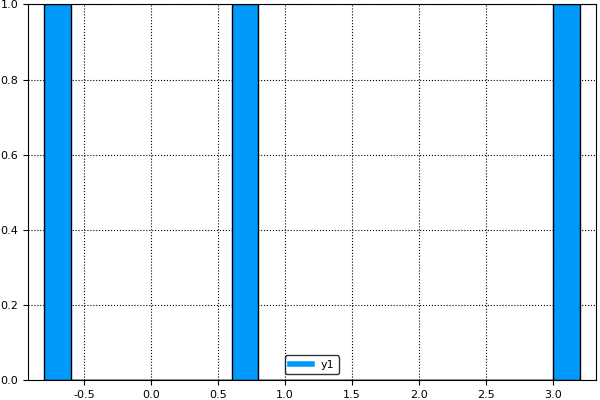

In [119]:
histogram(lamb)

[5] Repeat the eigenvalue calculation with different realizations of the disorder, and include all of the results in the histogram to improve the statistics.

In [121]:
function result()
    M = randn(3,3)
    S = Symmetric(M)
    evals = eigvals(S)
    μ = mean(evals)
    lamb = evals/μ
    return lamb
end
    

result (generic function with 1 method)


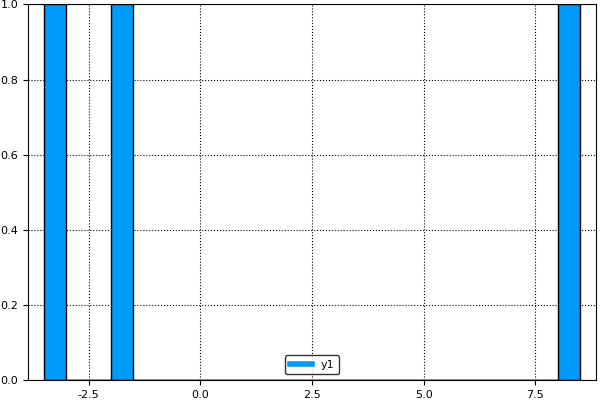

In [130]:
histogram(result())

[6] Calculate differences between successive eigenvalues, and normalise the result by its mean. To this several times to improve the statistics, and compare the histogram of the result with the known density function,

$$f(s) = \frac{\pi}{2} \, s \, e^{-\pi s^2/4}.$$

[7] Install the [`KernelDensity`](https://github.com/JuliaStats/KernelDensity.jl) package and use kernel density estimation instead.